# Exploración de modelos de red neuronal de PTA para vancomicina

## Modelo de red neuronal para indicador primario 
Indicador primario $\mathrm{AUC_{24}/MIC} \geq 400$

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
home_dir = os.getcwd()
nets_dir = os.path.join(home_dir, '09_SIMULACION_QUIMIOLUMINISCENCIA', "model")

In [3]:
model = keras.models.load_model(os.path.join(nets_dir, "model_001"))

Para la predicción se debe utilizar una lista con los siguientes parámetros: `["Dosis Diaria", "Intervalo entre dosis", "Tiempo de infusión", "CRCL", "log2(MIC)"]`

**Predicción para dosis de 2000 mg/d: 1g q12h tinf. 2 hrs**

In [28]:
prediction_CRCL = lambda DD, CLCR: model.predict([[DD, 12, 2, CLCR, 0]], verbose = 0)[0][0]

In [29]:
print(prediction_CRCL(2000, 90))
print(prediction_CRCL(2000, 100))
print(prediction_CRCL(2000, 120))

0.8542917
0.7918909
0.6174139


In [35]:
vec_CRCL = np.linspace(80, 170, 100)
vec_PTA  = [prediction_CRCL(2000, i) for i in vec_CRCL]

In [31]:
def bisseccion(a, b, f, NA = 1e3, tol = 1e-6):
    i = 1
    fa = f(a)

    while i <= NA:
        p = a + (b - a)/2
        fp = f(p)

        if fp == 0 or (b - a)/2 < tol:
            return p
        i += 1

        if fa * fp > 0:
            a = p
            fa = fp
        else:
            b = p

    return None

In [32]:
yintercept = bisseccion(80, 160, lambda x: prediction_CRCL(2000, x) - 0.85)
print(yintercept)
yintercept = bisseccion(80, 160, lambda x: prediction_CRCL(2000, x) - 0.90)
yintercept

90.71458876132965


80.36384999752045

(80.0, 170.0)

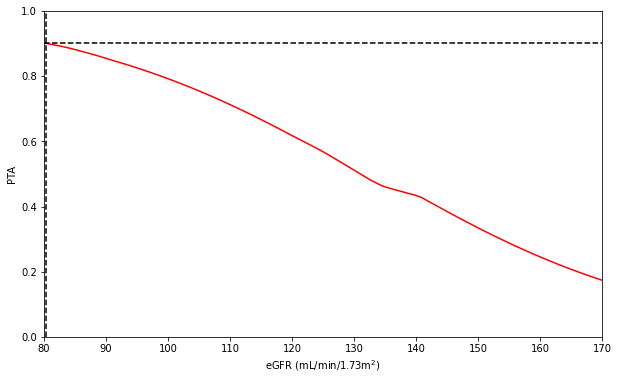

In [37]:
fig, ax = plt.subplots(1,1, figsize = (10, 6))

ax.plot(vec_CRCL, vec_PTA, 'r-')
ax.axhline(0.90, color = 'k', linestyle = '--')
ax.axvline(yintercept, color = 'k', linestyle = '--')

ax.set_xlabel("eGFR (mL/min/1.73m$^2$)")
ax.set_ylabel("PTA")
ax.set_ylim(0, 1)
ax.set_xlim(80, 170)

**Predicción para dosis de 2500 mg: 1.25 g q12h tinf. 2 hrs**

In [38]:
prediction_CRCL = lambda DD, CLCR: model.predict([[DD, 12, 2, CLCR, 0]], verbose = 0)[0][0]

In [42]:
vec_CRCL = np.linspace(80, 170, 100)
vec_PTA  = [prediction_CRCL(2500, i) for i in vec_CRCL]
yintercept = bisseccion(90, 150, lambda x: prediction_CRCL(2500, x) - 0.85)
print(yintercept)
yintercept = bisseccion(90, 150, lambda x: prediction_CRCL(2500, x) - 0.90)
yintercept

132.26940125226974


122.43445247411728

(80.0, 170.0)

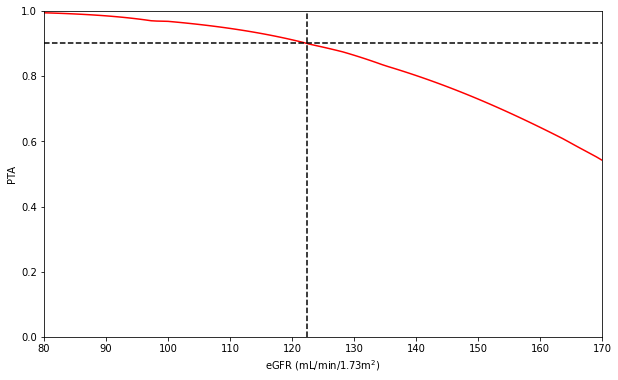

In [43]:
fig, ax = plt.subplots(1,1, figsize = (10, 6))

ax.plot(vec_CRCL, vec_PTA, 'r-')
ax.axhline(0.90, color = 'k', linestyle = '--')
ax.axvline(yintercept, color = 'k', linestyle = '--')

ax.set_xlabel("eGFR (mL/min/1.73m$^2$)")
ax.set_ylabel("PTA")
ax.set_ylim(0, 1)
ax.set_xlim(80, 170)

**Predicción para dosis de 3000 mg: 1.25 g q12h tinf. 2 hrs**

In [44]:
vec_CRCL = np.linspace(80, 170, 100)
vec_PTA  = [prediction_CRCL(3000, i) for i in vec_CRCL]
yintercept = bisseccion(80, 170, lambda x: prediction_CRCL(3000, x) - 0.85)
print(yintercept)
yintercept = bisseccion(80, 170, lambda x: prediction_CRCL(3000, x) - 0.90)
yintercept

166.6218952089548


157.5102313607931

(80.0, 170.0)

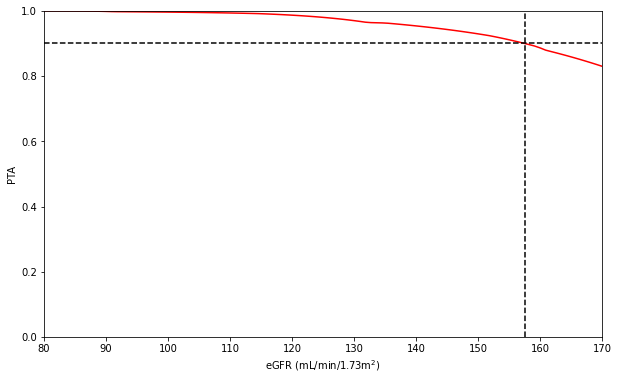

In [45]:
fig, ax = plt.subplots(1,1, figsize = (10, 6))

ax.plot(vec_CRCL, vec_PTA, 'r-')
ax.axhline(0.90, color = 'k', linestyle = '--')
ax.axvline(yintercept, color = 'k', linestyle = '--')

ax.set_xlabel("eGFR (mL/min/1.73m$^2$)")
ax.set_ylabel("PTA")
ax.set_ylim(0, 1)
ax.set_xlim(80, 170)